In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Performing EDA

In [2]:
deli=pd.read_csv("C:\\Users\\Hi\\Desktop\\ExceLR Assignments\\delivery_time.csv")
deli.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
deli.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


C:\Users\Hi\AppData\Local\Temp\ipykernel_15212\2865249861.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deli['Delivery_Time'])


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

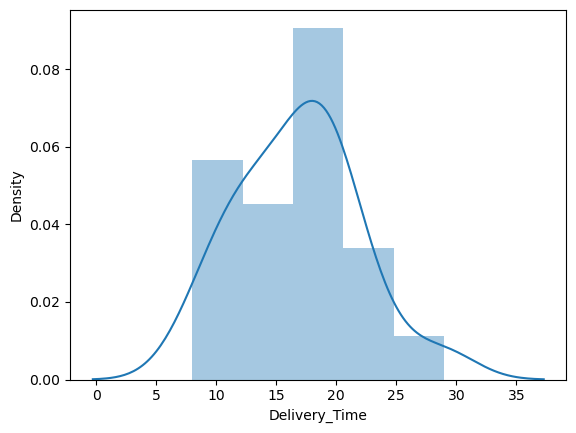

In [5]:
sns.distplot(deli['Delivery_Time'])

<AxesSubplot:>

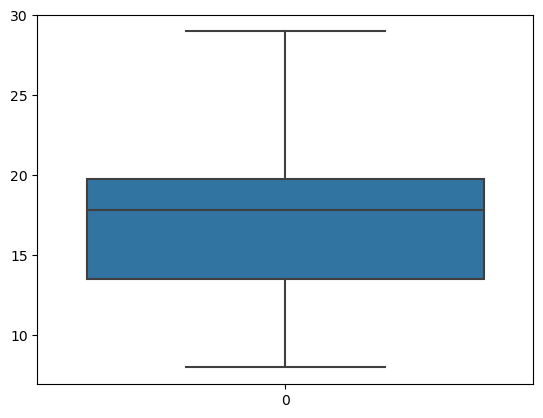

In [6]:
sns.boxplot(deli['Delivery_Time'])

C:\Users\Hi\AppData\Local\Temp\ipykernel_15212\3999427578.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deli['Sorting_Time'])


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

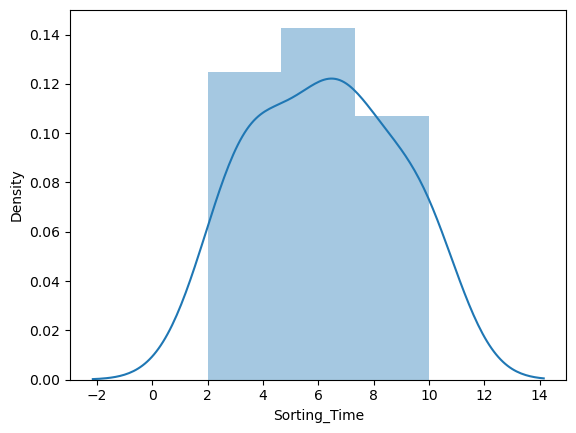

In [7]:
sns.distplot(deli['Sorting_Time'])

In [8]:
deli.corr() #there is positive correlation (r) between Target variable and independent variable

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


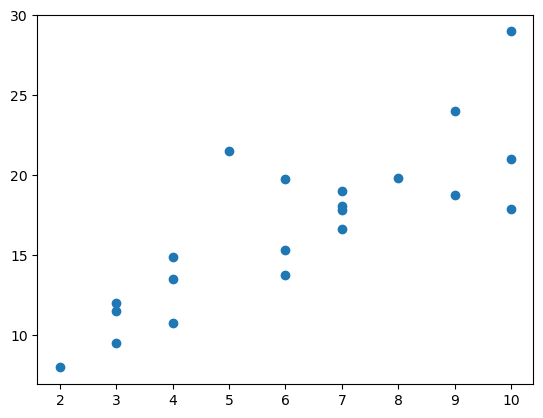

In [9]:
plt.scatter(deli.Sorting_Time,deli.Delivery_Time)


# Feature Scaling

In [10]:
#Normalization of the data
#from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [11]:

scaler = MinMaxScaler(feature_range=(0,1))
names=deli.columns
d=scaler.fit_transform(deli)
df=pd.DataFrame(d,columns=names)
df.head() #df is normalized data frame of deli

,Delivery_Time,Sorting_Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000


In [12]:
 deli.values

array([[21.  , 10.  ],
       [13.5 ,  4.  ],
       [19.75,  6.  ],
       [24.  ,  9.  ],
       [29.  , 10.  ],
       [15.35,  6.  ],
       [19.  ,  7.  ],
       [ 9.5 ,  3.  ],
       [17.9 , 10.  ],
       [18.75,  9.  ],
       [19.83,  8.  ],
       [10.75,  4.  ],
       [16.68,  7.  ],
       [11.5 ,  3.  ],
       [12.03,  3.  ],
       [14.88,  4.  ],
       [13.75,  6.  ],
       [18.11,  7.  ],
       [ 8.  ,  2.  ],
       [17.83,  7.  ],
       [21.5 ,  5.  ]])

In [54]:
#Automatic EDA using sweetviz and creating html file
import sweetviz as sv
sweet_report = sv.analyze(deli)
sweet_report.show_html('delivery_time_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report delivery_time_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Model Creation

In [14]:
#creating model
import statsmodels.formula.api as smf
model =smf.ols("Delivery_Time~Sorting_Time", data=df).fit()

In [15]:
model.params

Intercept       0.089561
Sorting_Time    0.628198
dtype: float64

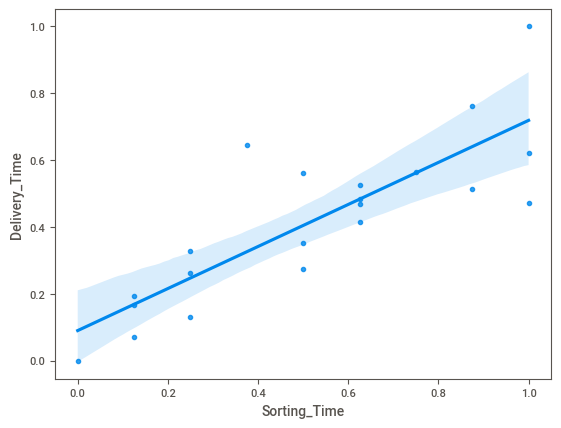

In [16]:
sns.regplot(x='Sorting_Time',y='Delivery_Time', data=df);
#after the regplot we can see there are influencing plot

In [17]:
print(model.tvalues,'\n', model.pvalues)#here pvalue of sorting time is <0.05 hence rejecting Null hypothesis 
#Sorting Time is actually dependent variable 

Intercept       1.496005
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.151079
Sorting_Time    0.000004
dtype: float64


In [18]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Test for Normality of Residuals (Q-Q Plot)

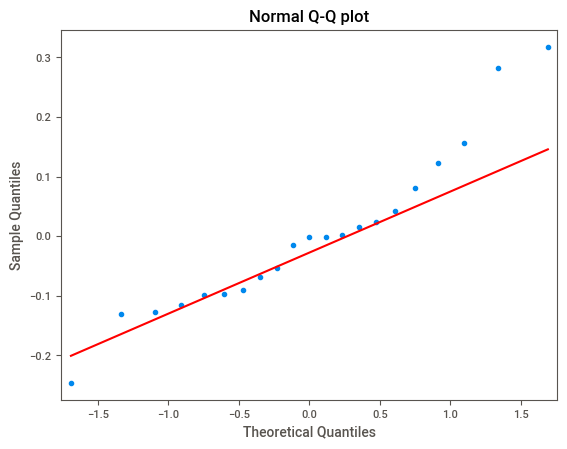

In [19]:
#qqplot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot")
plt.show()

# Residual Plot For Homoscedasticity

In [20]:
def get_standardized_values(vals):
    return((vals-vals.mean())/vals.std())


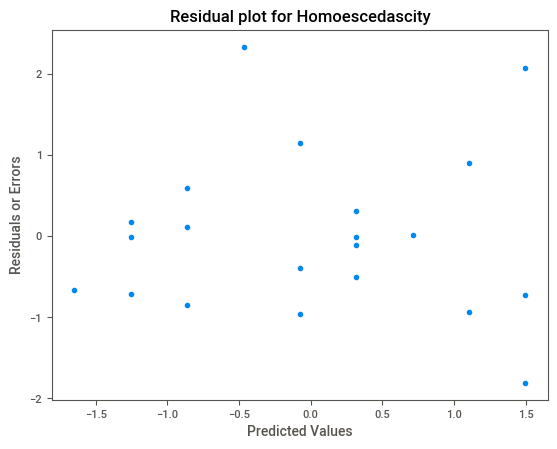

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual plot for Homoescedascity")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals or Errors")
plt.show()

# Residual vs Regressors

eval_env: 1


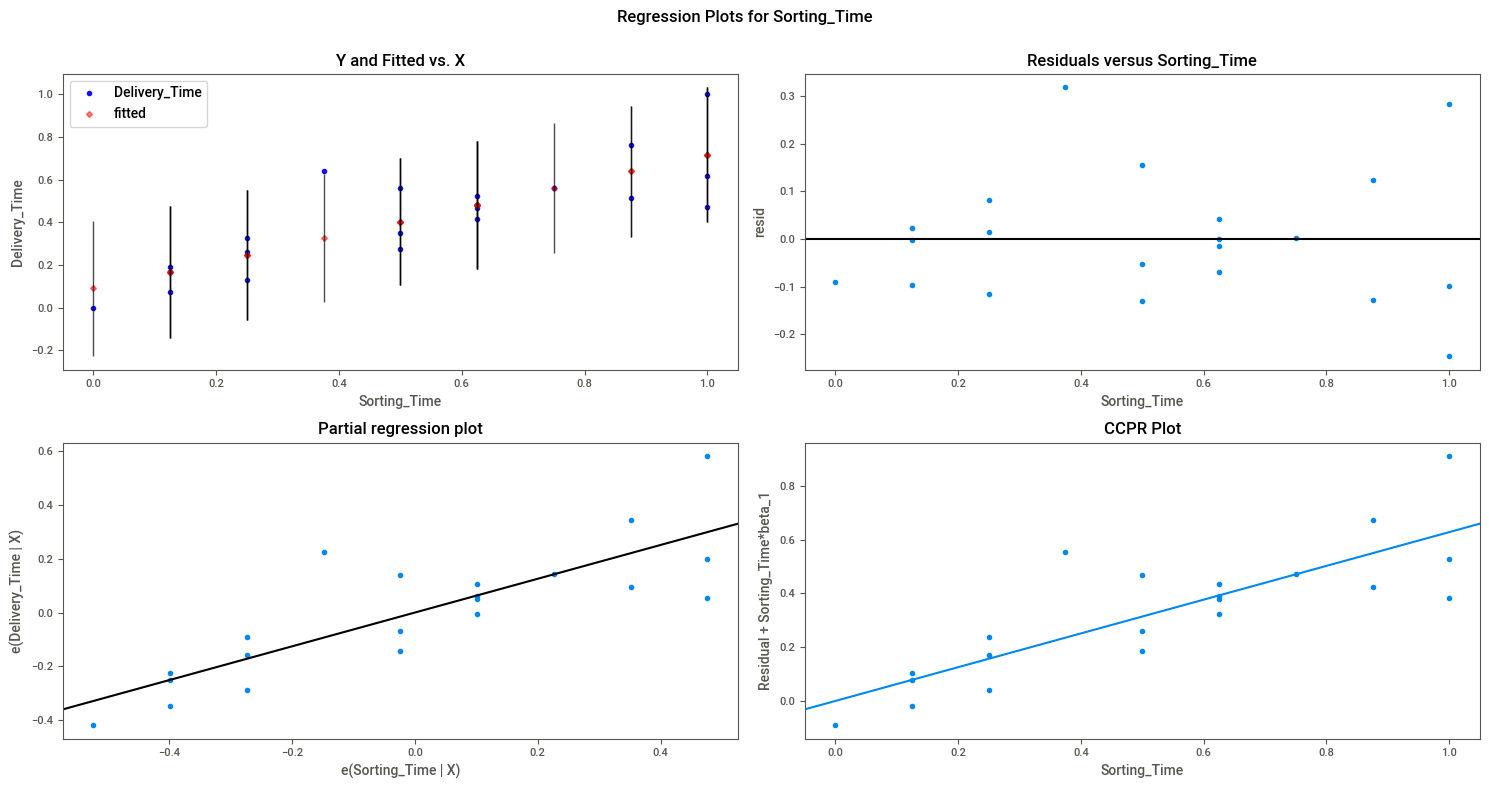

In [22]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Sorting_Time", fig=fig)
plt.show()

In [23]:
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance 
summary_cooks=model_influence.summary_frame()
summary_cooks.head()

,dfb_Intercept,dfb_Sorting_Time,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.147322,-0.278610,0.056517,-0.770600,0.159912,-0.336207,-0.762050,-0.332476
1,0.032245,-0.022432,0.000606,0.114391,0.084746,0.034808,0.111379,0.033891
2,0.148371,-0.019795,0.032861,1.142958,0.047900,0.256363,1.152810,0.258573
3,-0.099580,0.242465,0.052706,0.929723,0.108696,0.324673,0.926240,0.323457
4,-0.480507,0.908714,0.462053,2.203350,0.159912,0.961304,2.485504,1.084406


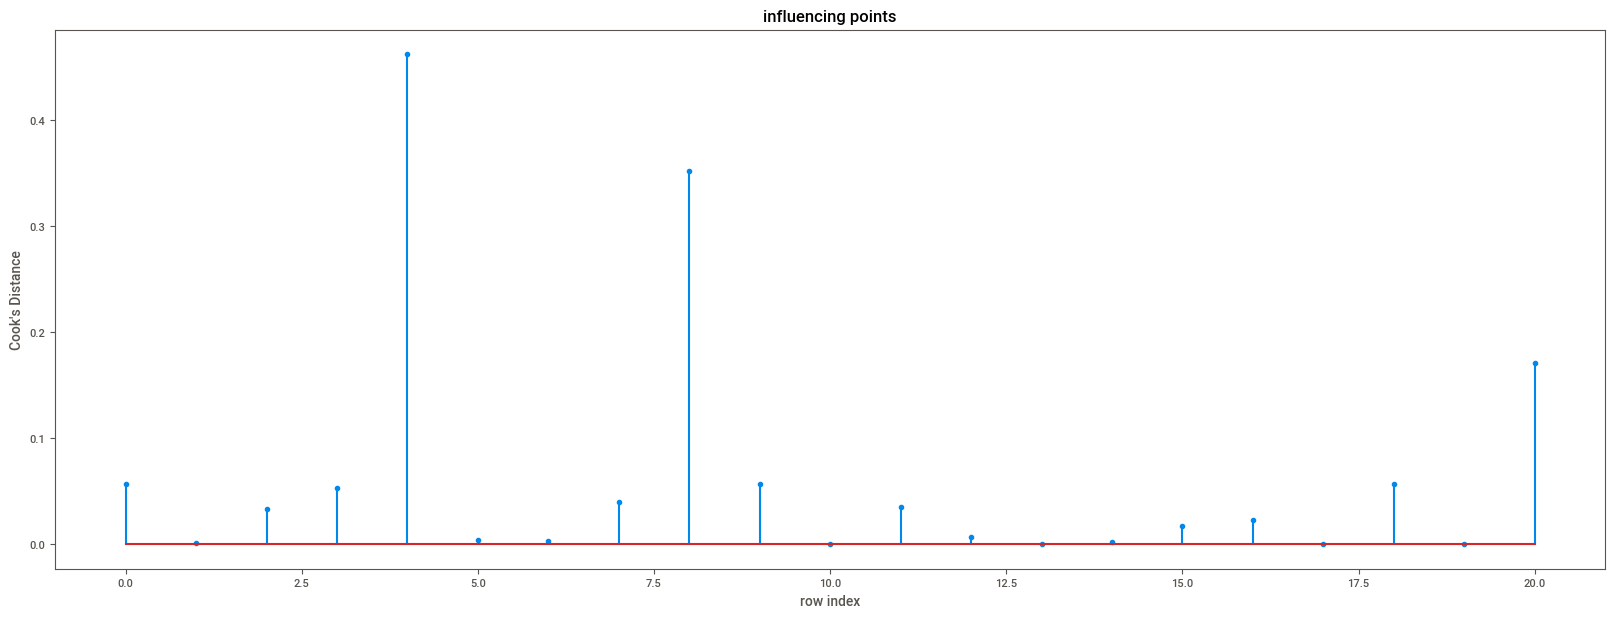

In [24]:
#plot the influencers using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.title("influencing points")
plt.xlabel("row index")
plt.ylabel("Cook's Distance")
plt.show()

In [25]:
#we can see that there are 2 high influencing points ,Cook's Distance threshold is given by 4/N or 4/(N-k-1) 
#where N is no.of observation and k no. of explanatory varibles. 
#ref - 1 Fox,John. (1991). Regression Diagnostics: An Intro.Sage Publications 
#so 4/N of Sorting Time its 4/20 = 0.2 is our threshold above 0.2 to be considered high influencing point
(np.argmax(c),np.max(c))
#it will display points c higher than .5

(4, 0.46205304126503316)

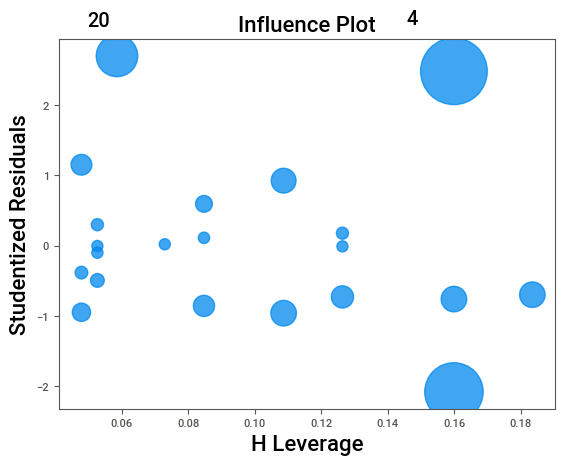

In [26]:
#High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

from the above bubble plot we can see that 4,20 high influencing points influencing the model we should replace ,retain or remove only 
when the domain experts suggest to  retain,replace or remove  the high influencing points


In [28]:
model.resid.mean()

1.8503717077085943e-16

C:\Users\Hi\AppData\Local\Temp\ipykernel_15212\2570432973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.resid)


<AxesSubplot:ylabel='Density'>

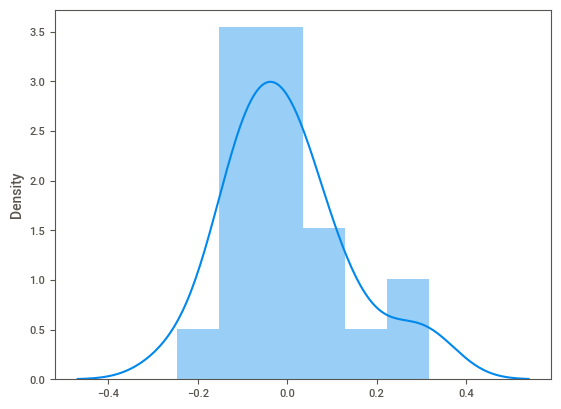

In [29]:
sns.distplot(model.resid)

In [30]:
df.Sorting_Time.median()

0.5

In [31]:
##improving model
deli_1=pd.read_csv("C:\\Users\\Hi\\Desktop\\ExceLR Assignments\\delivery_time.csv")


In [32]:
from sklearn import preprocessing
import pandas as pd
scaler= preprocessing.MinMaxScaler()
names= deli_1.columns
d= scaler.fit_transform(deli_1)
scaled_df=pd.DataFrame(d,columns=names)
scaled_df.head()

,Delivery_Time,Sorting_Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000


In [33]:
#scaled_df.loc[4,'Sorting_Time']
scaled_df.Sorting_Time.median(),scaled_df.Sorting_Time.mean()

(0.5, 0.5238095238095238)

# Creating Model2 by Replacing 4 & 20 influencing points in Sorting column by sorting time median which is 0.5 in normalized data


In [ ]:
scaled_df.loc[4,'Sorting_Time']=0.5
scaled_df.loc[20,'Sorting_Time']=0.5

In [35]:
scaled_df.head()

,Delivery_Time,Sorting_Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,0.500


In [36]:
import statsmodels.formula.api as smf
model2=smf.ols("Delivery_Time~Sorting_Time", data=scaled_df).fit()

In [58]:
model.params,    model2.params  #comparing model1 and model2 parameters

(Intercept       0.089561
 Sorting_Time    0.628198
 dtype: float64,
 Intercept       0.130251
 Sorting_Time    0.569946
 dtype: float64)

In [39]:
model2.rsquared,model2.rsquared_adj 
#R2 coefficient of determination determines accuracy of te model , here the model's accuracy has dropped after replacing data points with median

(0.4908362176421791, 0.4640381238338728)

In [40]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Creating Model3 by Dropping 4&20 rows to improve accuracy of the model 


In [ ]:
deli_2=scaled_df.drop([4,20],axis=0)

In [42]:
deli_2

,Delivery_Time,Sorting_Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
5,0.350000,0.500
6,0.523810,0.625
7,0.071429,0.125
8,0.471429,1.000
9,0.511905,0.875
10,0.563333,0.750


In [43]:
model3=smf.ols("Delivery_Time~Sorting_Time",data=deli_2).fit()

In [44]:
model3.params,model2.params,model.params

(Intercept       0.085959
 Sorting_Time    0.572975
 dtype: float64,
 Intercept       0.130251
 Sorting_Time    0.569946
 dtype: float64,
 Intercept       0.089561
 Sorting_Time    0.628198
 dtype: float64)

In [45]:
model3.tvalues,'/n' , model3.pvalues

(Intercept       1.953668
 Sorting_Time    7.698826
 dtype: float64,
 '/n',
 Intercept       6.739820e-02
 Sorting_Time    6.129953e-07
 dtype: float64)

In [46]:
model3.rsquared,model3.rsquared_adj

(0.7771132785587765, 0.7640022949445869)

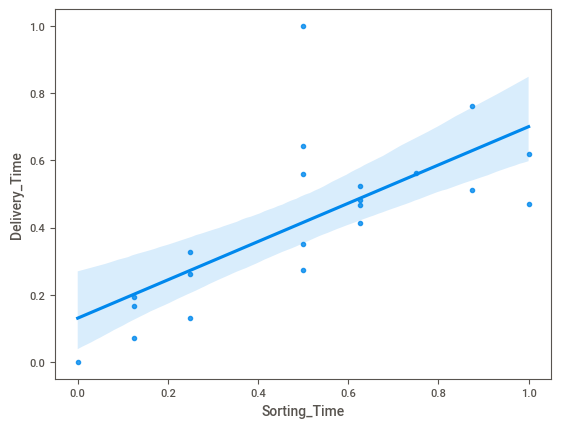

In [47]:
sns.regplot(x='Sorting_Time', y='Delivery_Time',data=scaled_df);

In [48]:
model3_influence=model3.get_influence()
(c3,_)=model3_influence.cooks_distance
summary3_cooks=model3_influence.summary_frame()
summary3_cooks.head()


,dfb_Intercept,dfb_Sorting_Time,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.097282,-0.180666,0.023672,-0.448408,0.190587,-0.217588,-0.437615,-0.212351
1,0.100412,-0.068344,0.005940,0.346725,0.089935,0.108997,0.337569,0.106118
2,0.269194,-0.010882,0.105034,1.944059,0.052656,0.458332,2.138668,0.504213
3,-0.264449,0.614387,0.266580,1.892757,0.129543,0.730178,2.066900,0.797358
5,-0.028529,0.001153,0.001512,-0.233252,0.052656,-0.054992,-0.226651,-0.053435


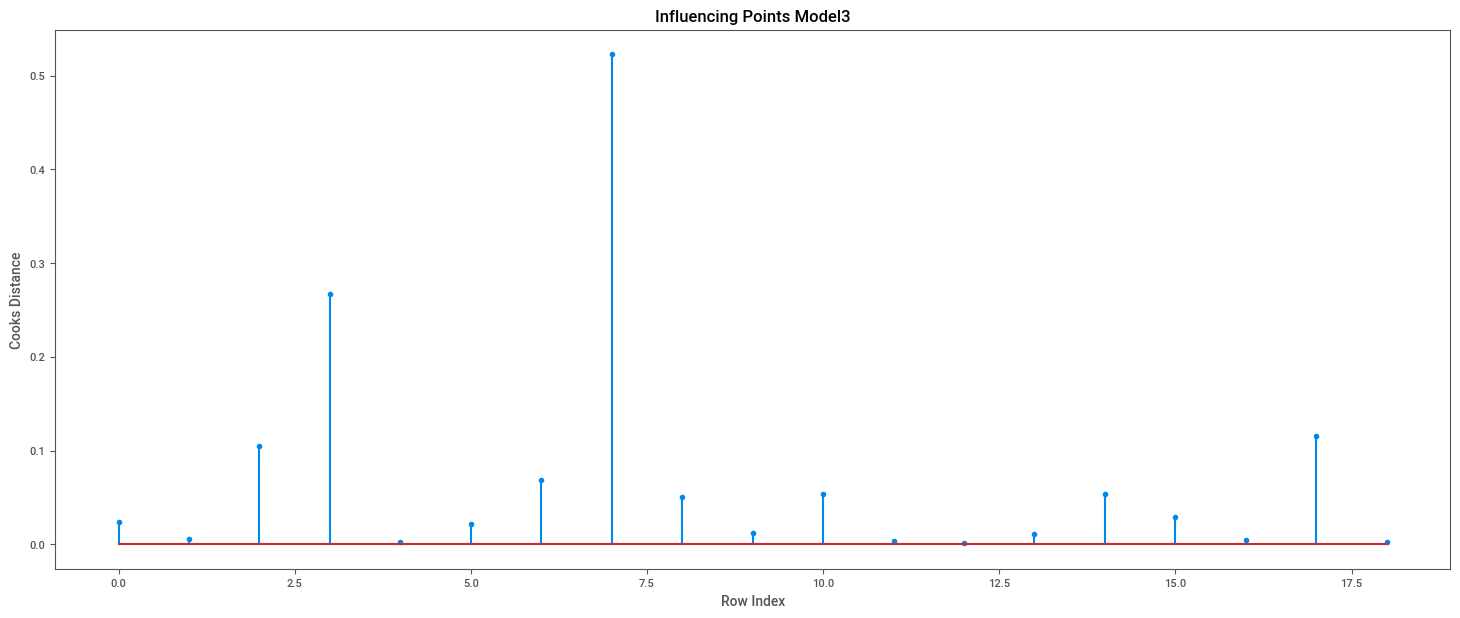

In [49]:
fig2=plt.subplots(figsize=(18,7))
plt.stem(np.arange(len(deli_2)),np.round(c3,3)) 
plt.title('Influencing Points Model3')
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

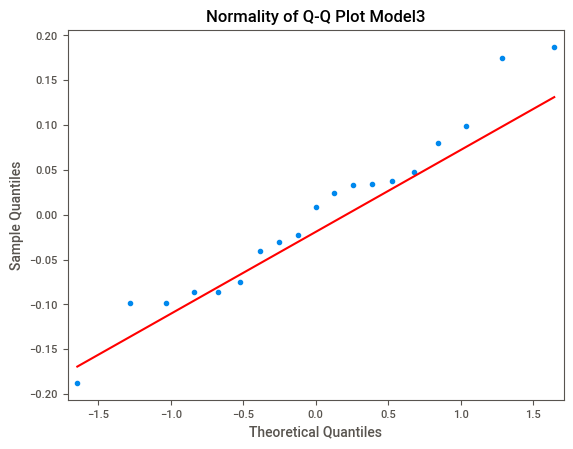

In [50]:
qqplot3=sm.qqplot(model3.resid,line='q') #qqplot of model3
plt.title('Normality of Q-Q Plot Model3')
plt.show()

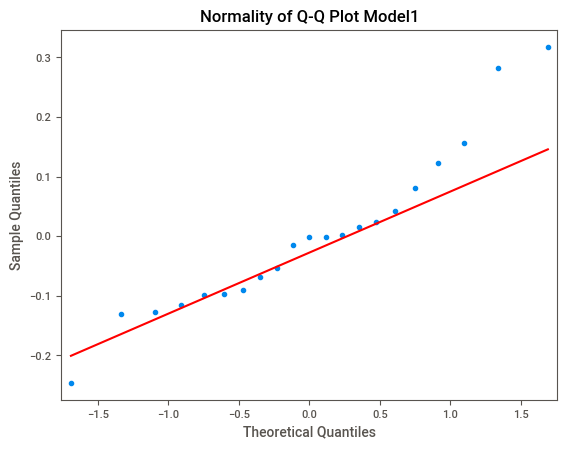

In [51]:
qqplot=sm.qqplot(model.resid,line='q') #qqplot of 1st model
plt.title('Normality of Q-Q Plot Model1')
plt.show()

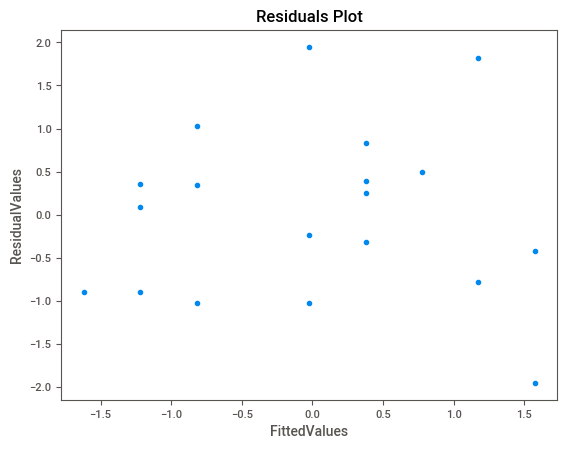

In [52]:
plt.scatter(get_standardized_values(model3.fittedvalues),get_standardized_values(model3.resid))
plt.title("Residuals Plot")
plt.xlabel("FittedValues")
plt.ylabel("ResidualValues")
plt.show() #There is no patterns in Residual vs Fitted Values ,hence No problem orelse we have to transform dataset in log or sigmoid or tanh

In [53]:
model3.rsquared,model3.rsquared_adj

(0.7771132785587765, 0.7640022949445869)

# Model3 is Ready to predict with 76% accuracy because adjusted rsquared value is 0.76